<img alt="Banner" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/ViolenciaRJ/main/Images/Banner.png">




*Um projeto inspirado por:*




<img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*



---

# Análise exploratória da violência no estado do Rio de Janeiro

O Rio de Janeiro é um estado brasileiro localizado na região sudeste. O estado possui uma população de aproximadamente **16.370.000 pessoas**, a terceira maior do país, habitando em uma área de 43.780 km², uma das menores do Brasil. Isso significa dizer que o Rio possui **elevadas densidades demográficas**, cerca de **366 habitantes por quilômetro quadrado**. Há um total de 92 municípios, dos quais podemos destacar as cidades de Niterói, São Gonçalo, Duque de Caxias, Volta Redonda e Nova Iguaçu. 95% da população fluminense habita o meio urbano.

<img alt="Rio de Janeiro" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/Images/RioDeJaneiro.jpg">

Além de sua grande densidade demográfica, o Rio também possui um **alto nível de desigualdade**, tanto que em 2014 foi considerado ao **sétimo mais desigual do país** (Fonte: [Sebrae/RJ](https://www.sebrae.com.br/Sebrae/Portal%20Sebrae/UFs/RJ/Anexos/28%20-%20Renda,%20Pobreza%20e%20Desigualdade%20no%20Estado%20do%20Rio%20de%20Janeiro.pdf)). Unindo esses dois fatores temos a receita para a alta taxa de violência e de criminalidade no estado.

Nesse notebook tentarei analisar os dados públicos disponibilizados pelo [ISPDados](http://www.ispdados.rj.gov.br/) e retirar um panorama dos casos de violência, crimes e estatísticas de segurança utilizando uma série histórica mensal no estado desde **01/1991**.
  
  
---
  

## Obtenção dos Dados

Os dados foram obtidos através do portal [ISPDados](http://www.ispdados.rj.gov.br/), uma página pública com os dados de registros criminais e de atividade policial do estado do Rio de Janeiro. De acordo com o portal "*As estatísticas divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.*"

  * O arquivo `csv` pré-processado, pode ser encontrado [aqui]( https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/RawData/violencia_rio.cs).
  
  * Os dados brutos estão disponíveis no seguinte endereço:
    * http://www.ispdados.rj.gov.br/estatistica.html

  * Através do portal também é possível acessar um *dashboard* interativo:
    * http://www.ispvisualizacao.rj.gov.br/index.html

### Importando os dados
Irei realizar a importação das bibliotecas que utilizaremos no notebook e em seguida importarei os dados.

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importando os dados
df = pd.read_csv("https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/RawData/violencia_rio.csv")

## Análise Inicial dos Dados

Em primeiro lugar precisamos saber quais são as dimensões de nosso *dataset* para que possamos entender com o que estamos lidando, para isso iremos verificar com quantas linhas e com quantas colunas ele está formado.

In [3]:
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])

Linhas:  344
Colunas:  56


Sabemos agora que nossos dados estão organizados em **344 linhas** e **56 colunas**. Continuaremos com a análise, verificando agora quais são os **nomes** dessas colunas, os seus **tipos** e criaremos um **dicionário de variáveis** para termos um entendimento melhor a respeito dos dados que estamos lidando.

Primeiro vamos imprimir as primeiras linhas do *dataset* para termos uma visão geral dos dados:

In [4]:
#Imprimir as 5 primeiras linhas do dataset.
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Agora veremos o nome de todas as colunas.

In [5]:
#Descobrir o nome das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

E agora os tipos de dados contidos em cada coluna. Aqui utilizei o método `info()`, pois esse nos dá, além do **tipo dos dados**, a **quantidade de valores não nulos** em cada coluna. Dessa maneira já temos um indício do nosso próximo passo, após o dicionário de variáveis, que é descobrir a quantidade e a porcentagem de **valores nulos** em nosso *dataset*

In [6]:
#Descobrir os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

### Dicionário de variáveis

`vano` - Ano da comunicação da ocorrência

`hom_doloso` - Homicídio doloso

`lesao_corp_morte` - Lesão corporal seguida de morte

`latrocinio` - Latrocínio

`hom_por_interv_policial` - Morte por intervenção Policial

`tentat_hom` - Tentativa de homicídio

`lesao_corp_dolosa` - Lesão corporal dolosa

`estupro` - Estupro

`hom_culposo` - Homicídio culposo

`lesao_corp_culposa` - Lesão corporal culposa

`roubo_comercio` - Roubo a estabelecimento comercial

`roubo_residencia` - Roubo a residência

`roubo_veiculo` - Roubo de veículo

`roubo_carga` - Roubo de carga

`roubo_transeunte` - Roubo a transeunte

`roubo_em_coletivo` - Roubo em coletivo

`roubo_banco` - Roubo a banco

`roubo_cx_eletronico` - Roubo de caixa eletrônico

`roubo_celular` - Roubo de telefone celular

`roubo_conducao_saque` - Roubo com condução da vítima para saque em instituição financeira

`roubo_apos_saque` - Roubo após saque em instituição financeira

`roubo_bicicleta` - Roubo de bicicleta

`outros_roubos` - Outros roubos

`total_roubos` - Total de roubos

`furto_veiculos` - Furto de veículo

`furto_transeunte` - Furto a transeunte

`furto_coletivo` - Furto em coletivo

`furto_celular` - Furto de telefone celular

`furto_bicicleta` - Furto de bicicleta

`outros_furtos` - Outros furtos

`total_furtos` - Total de furtos

`sequestro` - Sequestro

`extorsao` - Extorsão

`sequestro_relampago` - Sequestro relâmpago

`estelionato` - Estelionato

`apreensao_drogas` - Apreensão de drogas

`posse_drogas` - Posse de drogas

`trafico_drogas` - Tráfico de drogas

`apreensao_drogas_sem_autor` - Posse de drogas sem autor

`recuperacao_veiculos` - Recuperação de veículo

`apf` - Auto de prisão em flagrante

`aaapai` - Auto de apreensão de adolescente por prática de ato infracional

`cmp` - Cumprimento de mandado de prisão

`cmba` - Cumprimento de mandado de busca e apreensão

`ameaca` - Ameaça

`pessoas_desaparecidas` - Pessoas desaparecidas

`encontro_cadaver` - Encontro de cadáver

`encontro_ossada` - Encontro de ossada

`pol_militares_mortos_serv` - Policiais Militares mortos em serviço

`pol_civis_mortos_serv` - Policiais Civis mortos em serviço

`indicador_letalidade` - Indicadores Estratégicos: Crimes violentos letais intencionais

`indicador_roubo_rua` - Indicadores Estratégicos: Roubo na rua

`indicador_roubo_veic` - Indicadores Estratégicos: Roubo de veículo

`registro_ocorrencias` - Total de registros de ocorrências divulgados no mês

`fase` - Consolidado sem errata (2) ou com errata (3)

### Verificação dos valores nulos

Com o método `info()` pudemos perceber que existem **muitos valores nulos** em nosso *dataset*. Realizaremos agora uma análise mais aprofundada a respeito.

In [7]:
#Quantidade de valores nulos
df.isnull().sum().sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

Agora precisamos saber o quão significativo são esses valores quando comparados ao total de dados que possuímos.

In [8]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Percebemos que os valores nulos têm uma **proporção significativa**. Em situações normais poderíamos tratar esses valores utilizando diversas técnicas, nesse *dataset*, porém, a abordagem será diferente.

Como temos dados **registrados desde 1991** precisaremos analisar algumas hipóteses na tentativa de entender o motivo de tantos valores ausentes. Os principais motivos poderiam ser:

  * Alguns desses crimes poderiam **não estar sendo contabilizados** pelo órgão que coletou esses dados e gerou esse dataset. Ou seja, alguns crimes só começaram a ser **contabilizados a partir de determinado momento**.

  * Devemos considerar também o formato em que esses dados eram registrados à época. Pode ter ocorrido **falha de registro** ou **perda de informações** devido ao tempo, ou por mudança no método de armazenamento dos dados (de meios analógicos para digitais, por exemplo).

Para essa verificação irei plotar um mapa de calor (*heatmap*) na tentativa de encontrar o **início da contagem** de determinados crimes e verificar onde estão localizados os dados ausentes.
  


In [9]:
#Criar uma cópia do dataset original para um dataset auxiliar
df_aux = df.copy()

#Modificar o index do novo dataset 
df_aux.set_index(['vano', 'mes'], inplace = True)



In [10]:
#Incluir as colunas com valores nulos em uma vairável de nome val_nulos
val_nulos = (df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

#Converter as colunas que são diferentes de 0, ou seja, que contém valores nulos, para uma lista.
lista_nulos = val_nulos.loc[val_nulos != 0].index.to_list()

#Visualizar a lista criada.
lista_nulos

['roubo_bicicleta',
 'furto_bicicleta',
 'apreensao_drogas_sem_autor',
 'posse_drogas',
 'apf',
 'aaapai',
 'cmp',
 'trafico_drogas',
 'cmba',
 'sequestro_relampago',
 'furto_coletivo',
 'extorsao',
 'furto_celular',
 'roubo_apos_saque',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'estupro',
 'estelionato',
 'pol_civis_mortos_serv',
 'pol_militares_mortos_serv',
 'pessoas_desaparecidas',
 'encontro_ossada',
 'roubo_celular',
 'lesao_corp_culposa',
 'ameaca',
 'sequestro',
 'lesao_corp_morte',
 'registro_ocorrencias',
 'hom_por_interv_policial',
 'hom_culposo']

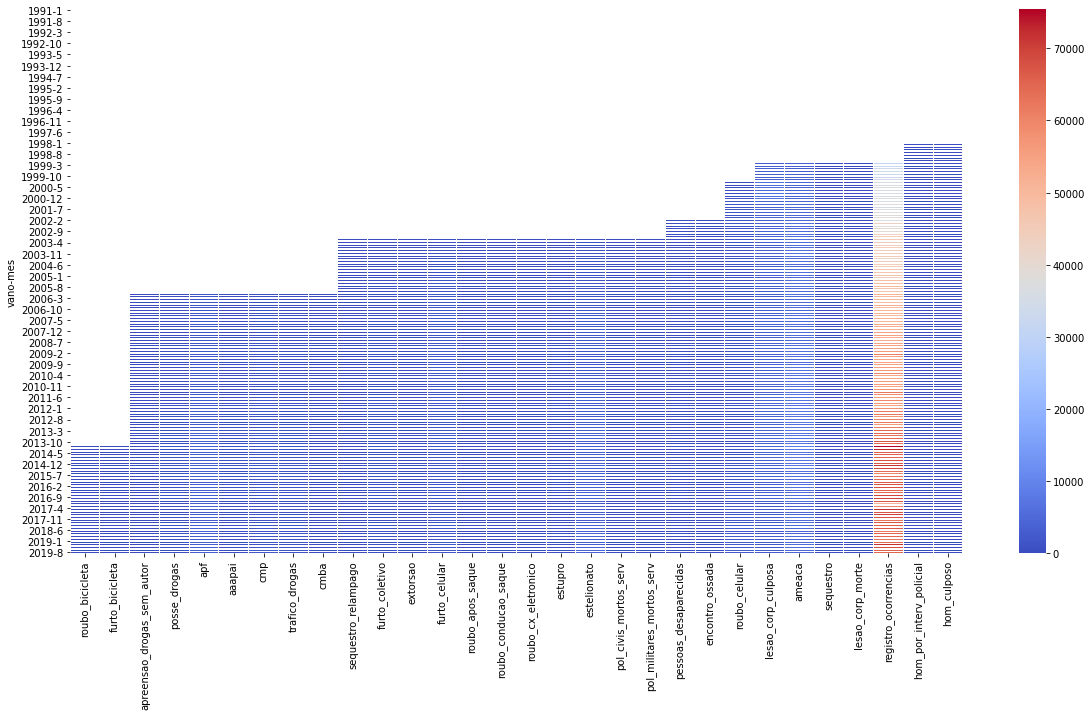

In [11]:
#Plotar o heatmap da lista com todas as colunas que possuem valores nulos
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_aux[lista_nulos], cmap="coolwarm", linewidths=.006);

O *heatmap* acima nos informa apenas as **colunas que contém valores nulos** e nos mostra a **partir de que momento** determinadas colunas começaram a ser populadas com dados. As cores nos informam a quantidade de valores ausentes presentes em determinado período, sendo:
* **Azul-escuro para azul-claro**: valores ausentes do menor (azul-escuro) para o maior valor(azul-claro);
* **Laranja-claro para Laranja-escuro** : Valores ausentes do menor (laranja-claro) para o maior valor (laranja-escuro)

Podemos perceber que o provável **motivo para os dados ausentes seja o momento em que determinados crimes passaram a ser contabilizados**. Crimes relacionados a roubo ou furto de bicicletas só passaram a ser contabilizados entre 2013 e 2014, por exemplo.

A exceção está na coluna `registro_ocorrencias` , que nos informa o **Total de registros de ocorrências divulgados no mês**. Essa coluna possui muitos valores ausentes mesmo após o início do registro dos dados. Podem existir diversos motivos para essa ausência, porém, no momento não iremos entrar em detalhes e nem iremos trabalhar nesses dados faltantes, para evitar qualquer enviesamento.

Trabalharemos de modo que os dados faltantes, mesmo na coluna `registro_ocorrencias`, não afete a análise e as conclusões tiradas. Trataremos os dados das seguintes maneiras:

* Da data em que começaram a ser registrados.
* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.) 

## Informações Estatísticas e Visualização de Dados

Agora que já sabemos a quantidade e o motivo dos valores ausentes em nosso *dataset*, podemos verificar as informações estatísticas dos nossos dados.

Começaremos com o método `describe`, que nos dará uma visão geral.


In [12]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

O retorno do método nos da informações estatísticas bastante completas. **Apesar de o desvio padrão** de algumas colunas ser alto e de os valores máximos de outras estarem um pouco distantes, nosso dataset **não aparenta possuir outliers**.

Esse comportamento pode ser explicado pelo alto número de valores ausentes presentes no dataset, mas que já foi explicado anteriormente. Com isso, não realizaremos nenhum tipo de tratamento, de modo a não enviesar os dados.

**Dessa forma os dados serão analisados de acordo com a categoria do crime e por períodos de tempo.**

### Crimes contra o patrimônio

"*Os crimes contra o patrimônio são aqueles que atentam diretamente contra o patrimônio de uma pessoa ou organização. Considera-se patrimônio de uma pessoa física ou organização os seus bens, o poderio econômico e, entre outros, a universalidade de direitos que tenham expressão econômica para seu proprietário.*" (Fonte: [LFG](https://www.lfg.com.br/conteudos/artigos/geral/crimes-contra-o-patrimonio))

#### Veículos

Aqui analisaremos um dos crimes mais comuns nas metrópoles brasileiras. Como nosso dataset possui dados sobre roubo, furto e recuperação de veículos, podemos traçar uma linha da atual situação desse tipo de crime no estado.


In [13]:
#Total de veiculos roubados ou furtados
roubo_furto_veiculos = (df_aux.roubo_veiculo + df_aux.furto_veiculos).sum()

#Total de veículos recuperados no período
total_recuperados = df_aux.recuperacao_veiculos.sum()

#Total de veículos não recuperados no período
total_nao_recuperados = roubo_furto_veiculos - total_recuperados

#Média de roubos de veiculos por mês
media_roubo_veiculos = df_aux.roubo_veiculo.mean()

#Média de furto de veículos por mês
media_furto_veiculos = df_aux.furto_veiculos.mean()

#Média de recuperação de veículos por mês
media_recuperacao_veiculos = df_aux.recuperacao_veiculos.mean()

#Média do total de veículos perdidos por mês
media_total = media_roubo_veiculos + media_furto_veiculos

#Porcentagem de veículos recuperados por mês
pct_recuperados = (media_recuperacao_veiculos / media_total) * 100

print("Estatísticas gerais para roubos e furtos de veículos desde 1991\n")
print("Total de roubos e furtos de veículos no período: {:.0f}".format(roubo_furto_veiculos))
print("Total de veículos recuperados no período: {:.0f}".format(total_recuperados))
print("Total de veículosperdidos no período: {:.0f}".format(total_nao_recuperados))

print("\nMédia de roubos e furtos de veiculos por mês: {:.0f}".format( media_total))
print("Média de roubo de veículos por mês: {:.0f}".format(media_roubo_veiculos))
print("Média de furto de veículos por mês: {:.0f}".format(media_furto_veiculos))
print("Média de veículos perdidos por mês: {:.0f}".format(media_total - media_recuperacao_veiculos))
print("Média de veículos recuperados por mês: {:.0f}".format(media_recuperacao_veiculos))
print("Porcentagem de veículos recuperados por mês: {:.2f}%".format(pct_recuperados))

Estatísticas gerais para roubos e furtos de veículos desde 1991

Total de roubos e furtos de veículos no período: 1418439
Total de veículos recuperados no período: 609650
Total de veículosperdidos no período: 808789

Média de roubos e furtos de veiculos por mês: 4123
Média de roubo de veículos por mês: 2449
Média de furto de veículos por mês: 1675
Média de veículos perdidos por mês: 2351
Média de veículos recuperados por mês: 1772
Porcentagem de veículos recuperados por mês: 42.98%


Desde 1991 foram **furtados em torno de 1.418.439** veículos no Rio de Janeiro, 
algo assustador. Destes, **609.650 foram recuperados** e **808.789 foram perdidos**.

O estado tem uma média de **4.123 roubos e furtos de veículos por mês** onde apenas **42,98% são recuperados**. Os furtos têm uma média de 1.675 ocorrências por mês e os roubos são responsáveis por 2.449 ocorrências por mês.



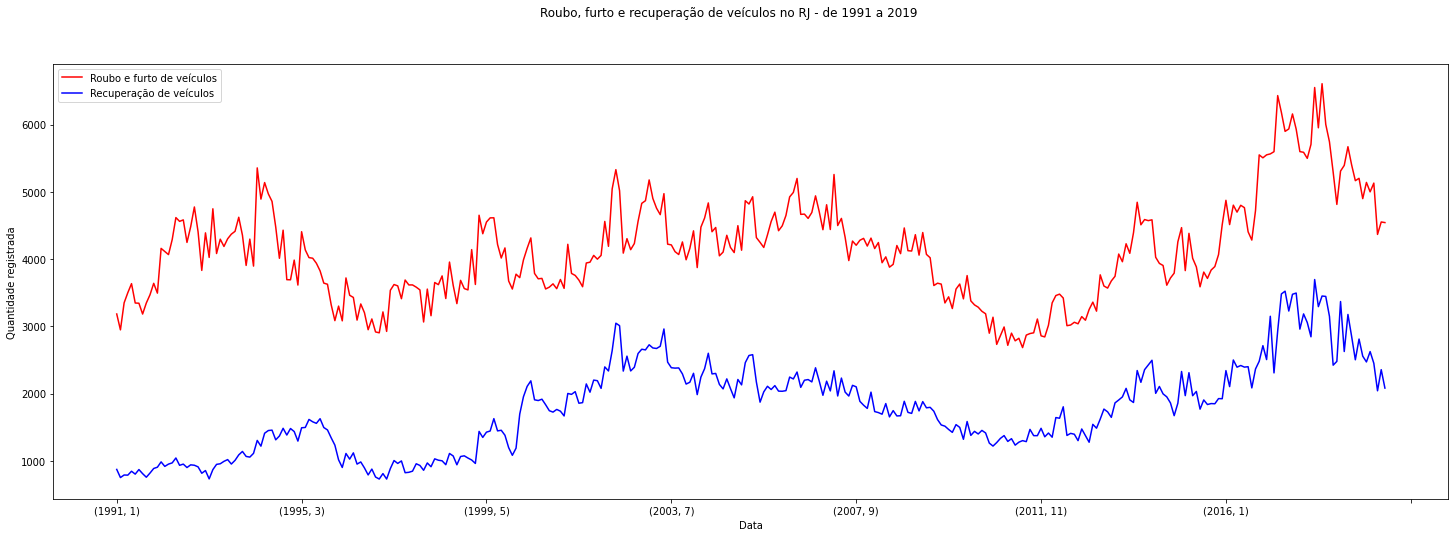

In [14]:
#Criar a figura
fig = plt.figure(figsize=(25,8))

#Criar a variável para conter a quantidade de roubos mais furtos
roubo_furto_veiculos_ano = (df_aux.roubo_veiculo + df_aux.furto_veiculos);

#Renomear os dados exibidos para melhorar a visualização
roubo_furto_veiculos_ano.name = "Roubo e furto de veículos";
df_aux.recuperacao_veiculos.name = "Recuperação de veículos";

#plotar os gráficos
roubo_furto_veiculos_ano.plot(legend = True, color='red' );
df_aux.recuperacao_veiculos.plot(legend = True, color = 'blue');

#Editar a configuração de exibição
plt.xlabel('Data');
plt.ylabel('Quantidade registrada');
plt.suptitle("Roubo, furto e recuperação de veículos no RJ - de 1991 a 2019");

#Exibir a imagem
plt.show()



O plot acima nos dá uma representação visual do total de **roubos e furtos de veículos (vem vermelho)** em comparação com a **recuperação de veículos (em azul) no período analisado.**

#### Roubos e furtos

Infelizmente esse talvez seja o crime mais corriqueiro em qualquer cidade brasileira. Muito provavelmente você já foi ou conhece alguém que já foi vítima de um assalto ou furto.

Iremos plotar abaixo um gráfico do total de roubos mais total de furtos durante o período apurado.


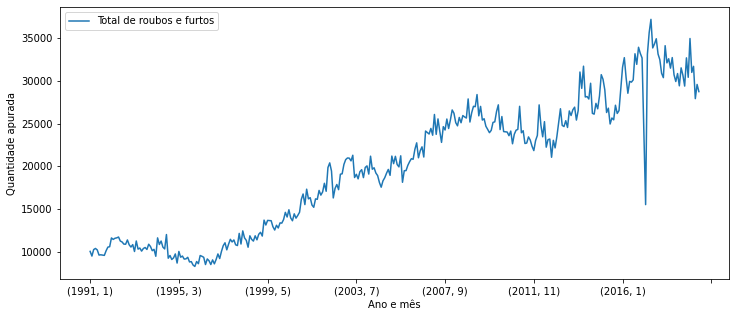

In [31]:
#Soma dos totais de roubo e furto no período e armazenamento em uma variável
total_roubos_furtos = df_aux.total_furtos + df_aux.total_roubos

#Plotar o gráfico da soma
fig = plt.figure(figsize=(12,5))
total_roubos_furtos.plot(legend=True, label = "Total de roubos e furtos", xlabel = "Ano e mês", ylabel = "Quantidade apurada");

Com o gráfico pode-se notar um **aumento grande no número total** de roubos e furtos. Vamos analisar mais profundamente, verificando os totais dessas categorias de crime no início e no final da apuração dos dados

In [16]:
#Quantidade total de roubos e furtos em 1991 e 2019
roubos_furtos_1991 = total_roubos_furtos.loc[1991].mean()
roubos_furtos_2019 = total_roubos_furtos.loc[2019].mean()

#Calculo da porcentagem de aumento
pct_aumento_roubos_furtos = ((roubos_furtos_2019 - roubos_furtos_1991) / roubos_furtos_1991) * 100

#Exibição das informações
print("Estatísticas gerais para roubos e furtos 1991\n")
print("Total de roubos e furtos em 1991: {:.2f}".format(roubos_furtos_1991))
print("Total de roubos e furtos em 2019: {:.2f}".format(roubos_furtos_2019))
print("Aumento percentual do total de roubos e furtos: {:.2f}%".format(pct_aumento_roubos_furtos))

Estatísticas gerais para roubos e furtos 1991

Total de roubos e furtos em 1991: 9999.58
Total de roubos e furtos em 2019: 30870.88
Aumento percentual do total de roubos e furtos: 208.72%


Temos um surpreendente aumento de **208,72% na média de roubos e furtos no estado entre 1991 e 2019**.

Porém, **aqui podemos ter uma análise errônea**, pois nem todos os dados de determinados tipos de roubos ou furtos começaram a ser computados em 1991.

Analisando novamente o nosso heatmap plotado acima podemos chegar a conclusão que a **melhor data para início dessa verificação** talvez seja por volta de **2004**, onde temos o início da verificação de crime de `furto_coletivo` e `furto_celular`. Poderíamos pensar também em iniciar a análise a partir de 2013, quando os crimes relacionados a bicicleta começaram a fazer parte dos dados, porém perderíamos 10 anos de dados com isso e a relevância dos dados que ganharíamos talvez não seja tão grande.

In [33]:
#Quantidade total de roubos e furtos em 2004
roubos_furtos_2004 = total_roubos_furtos.loc[2004].mean()

#Calculo da porcentagem de aumento
pct_aumento_roubos_furtos_novo = ((roubos_furtos_2019 - roubos_furtos_2004) / roubos_furtos_2004) * 100

#Exibição das informações
print("Estatísticas gerais para roubos e furtos 2004\n")
print("Total de roubos e furtos em 2004: {:.2f}".format(roubos_furtos_2004))
print("Total de roubos e furtos em 2019: {:.2f}".format(roubos_furtos_2019))
print("Aumento percentual do total de roubos e furtos: {:.2f}%".format(pct_aumento_roubos_furtos_novo))

Estatísticas gerais para roubos e furtos 2004

Total de roubos e furtos em 2004: 19139.42
Total de roubos e furtos em 2019: 30870.88
Aumento percentual do total de roubos e furtos: 61.29%


**A diferença** é perceptível entre as duas análises. Agora temos um aumento de **61,29% na média desses tipos de crimes, entre 2004 e 2019**. 

Essa diferença tão grande pode ser explicada não só pelos valores ausentes em determinadas categorias de crimes analisados, mas também pelo fato de que **determinados crimes**, como `roubo_transeunte`, `roubo_veiculo`,`roubo_carga`, `roubo_em_coletivo`,`furto_transeunte`, entre outros, não possuem **nenhum valor nulo**, ou seja, os dados foram computados **desde o início** da apuração e provavelmente têm um peso bastante grande.

Vamos analisar agora justamente a **porcentagem** que cada tipo de crime tem em comparação com o total.

Como o *dataset* possui uma quantidade bem grande de diferentes tipos de roubos e furtos, iremos **separar os dados desses tipos de crime** em outro *dataset* exclusivo para realizarmos a análise.

In [36]:
#Criar um dataset com as categorias de roubos
df_roubos_furtos = df_aux[['roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque','outros_roubos', 'roubo_apos_saque',
       'roubo_bicicleta' ,'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos']]
  
#Calcular a porcentagem
pct_roubos_furtos = ((df_roubos_furtos.sum()/ (df_roubos_furtos.sum().sum())) * 100).sort_values(ascending=False)
pct_roubos_furtos

outros_furtos           30.180953
roubo_transeunte        17.211970
roubo_veiculo           12.328992
furto_veiculos           8.431834
furto_transeunte         7.647645
outros_roubos            6.098413
furto_celular            4.242138
roubo_em_coletivo        3.318026
roubo_celular            3.309024
roubo_comercio           2.290917
furto_coletivo           1.903404
roubo_carga              1.713497
roubo_residencia         0.671078
roubo_apos_saque         0.426402
furto_bicicleta          0.124219
roubo_banco              0.047202
roubo_conducao_saque     0.033137
roubo_bicicleta          0.010758
roubo_cx_eletronico      0.010392
dtype: float64

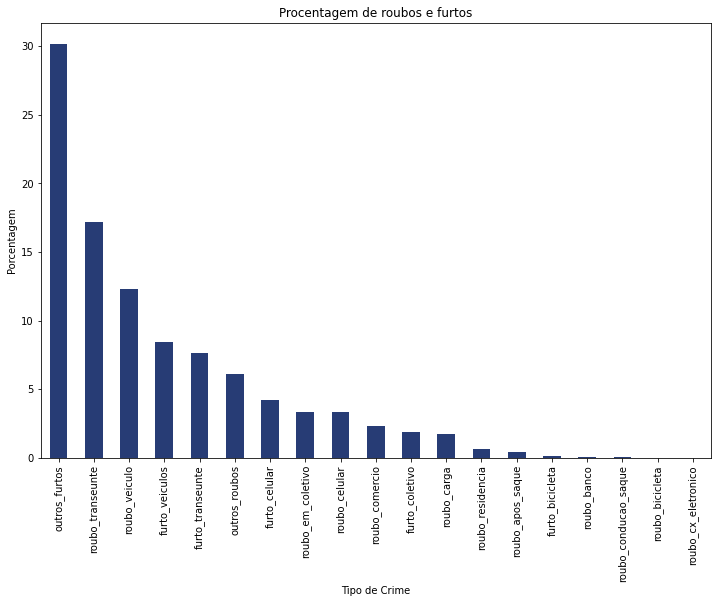

In [37]:
#Plotar a porcentagem
pct_roubos_furtos.sort_values(ascending=False).plot(kind='bar',xlabel="Tipo de Crime", ylabel="Porcentagem",
                                                    title="Procentagem de roubos e furtos", color='#273c75', figsize=(12,8));

Aqui temos uma **informação interessante**: o crime `outros_furtos` é o que possui a **maior relevância** entre todos os outros, com **30% do total**. Esse é um dos crimes que **não possuem valor nulo** e que é **computado desde 1991**, corroborando com a suspeita que tínhamos quanto ao aumento de números de crimes desde 1991 em relação ao aumento desde 2004.

Infelizmente não temos indicação do que se trata esse crime, nem mesmo no dicionário de variáveis, porém **não podemos exclui-lo** da análise devido ao seu peso e importância.

### Crimes contra a vida

" *Como o próprio nome indica, os crimes contra a vida são aqueles que podem terminar em morte, intencionada ou não.* " (Fonte: [mundoadvogados.com.br](https://www.mundoadvogados.com.br/artigos/quais-sao-os-crimes-contra-a-pessoa))

#### Homicídio doloso

Dentre todos os crimes que alguém pode cometer, com certeza o homicídio é um dos piores. 

Tentaremos traçar um histórico anualizado dessa categoria de crime e verificar quais foram os períodos com os maiores e menores números de casos registrados.

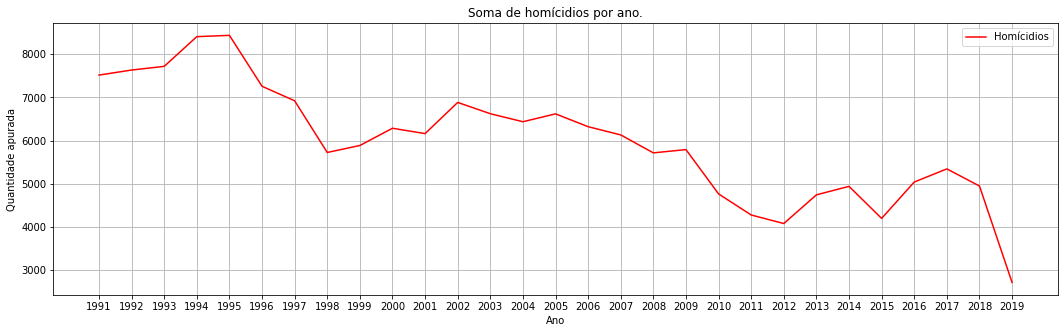

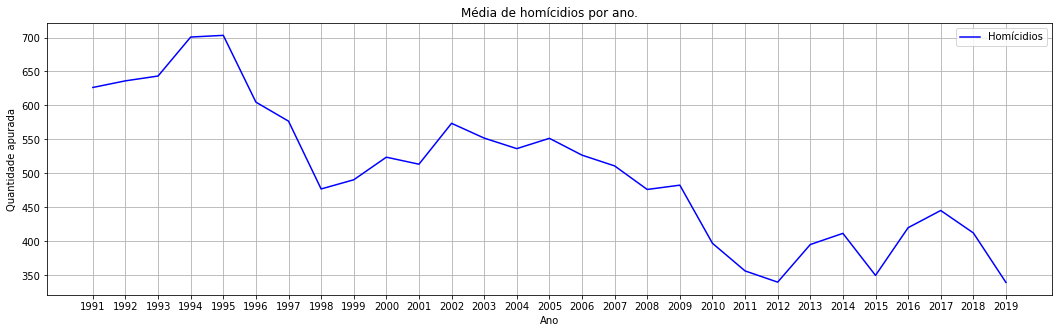

In [20]:
#Criar as variáveis para armazenar as somas e as médias
soma_homicidio = df_aux.groupby(['vano']).sum()
media_homicidio = df_aux.groupby(['vano']).mean()

#Criar a figura do gráfico 1
fig = plt.figure(figsize=(18,5))

#plotar o gráfico da soma com as legendas e o grid pra melhor visualização
soma_homicidio.hom_doloso.plot(color='red',grid=True, legend=True, label='Homícidios', title='Soma de homícidios por ano.')
plt.ylabel("Quantidade apurada")
plt.xlabel("Ano")
plt.xticks(range(1991,2020))

#exibir a figura
plt.show()

#Criar a figura do gráfico 2
fig = plt.figure(figsize=(18,5))

#plotar o gráfico da média com as legendas e o grid pra melhor visualização
media_homicidio.hom_doloso.plot(color='blue',grid=True, legend=True, label='Homícidios', title='Média de homícidios por ano.')
plt.ylabel("Quantidade apurada")
plt.xlabel("Ano")
plt.xticks(range(1991,2020))

#exibir a figura
plt.show()

Conseguimos perceber nitidamente uma **redução nos casos de homicídio** no estado, algo muito bom. Vejamos agora a comparação entre os maiores e menores valores apurados no período e também entre o início e final da apuração dos dados.

In [21]:
#Variáveis para os valores máximos e mínimos
max_homicidio = df_aux.hom_doloso.max()
min_homicidio = df_aux.hom_doloso.min()
pct_hominicio = (1-(min_homicidio / max_homicidio)) * 100

#Exibindo o resultado
print("Quantidade mínima de homicídios na série: ", min_homicidio)
print("Quantidade máxima de homicídios na série: ", max_homicidio)
print("Uma redução de {:.2f}% na quantidade de homicídios, quando comparados o maior e o menor valor".format(pct_hominicio))

#Variáveis para o primeiro e o último valor
primeiro_homicidio = df_aux.hom_doloso.iloc[0]
ultimo_homicidio = df_aux.hom_doloso.iloc[-1]
pct_hominicio_inicio_fim = (1-(ultimo_homicidio / primeiro_homicidio)) * 100

#Exibindo o resultado
print("\nPrimeiro valor computado na série histórica: ", primeiro_homicidio)
print("Último valor computado na série histórica: ", ultimo_homicidio)
print("Uma redução de {:.2f}% na quantidade de homicídios, quando comparados o primeiro e o último valor na série histórica".format(pct_hominicio_inicio_fim))


Quantidade mínima de homicídios na série:  272
Quantidade máxima de homicídios na série:  831
Uma redução de 67.27% na quantidade de homicídios, quando comparados o maior e o menor valor

Primeiro valor computado na série histórica:  657
Último valor computado na série histórica:  318
Uma redução de 51.60% na quantidade de homicídios, quando comparados o primeiro e o último valor na série histórica


Essa realmente é uma excelente notícia, não existem dúvidas que os crimes de **homicídio doloso estão em queda**.

Quando comparamos os **maiores e os menores valores registrados** durante o período apurado temos uma **redução de 62,27%**, e quando comparamos os **valores apurados no início e no fim da série histórica** dos dados temos uma **redução de 51,60%**.

#### Latrocínio

O latrocínio é um crime bastante violento e que tem como característica o roubo seguido por morte. 

A análise também se dará por **um histórico anualizado e pela análise dos períodos com os maiores e menores** números de casos registrados, assim como nos crimes de homicídio doloso.

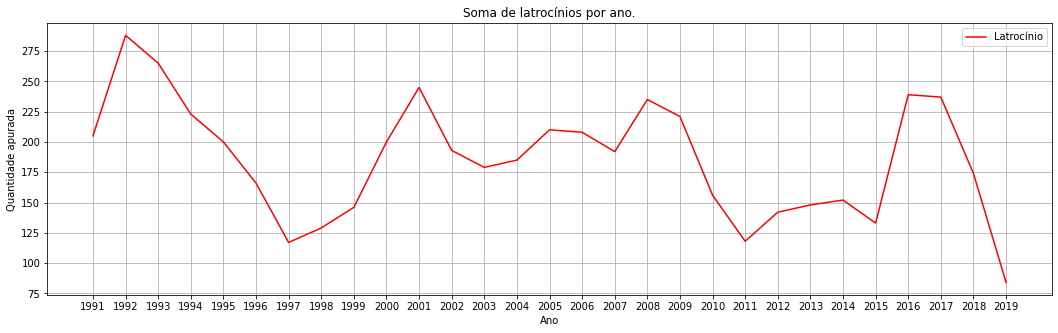

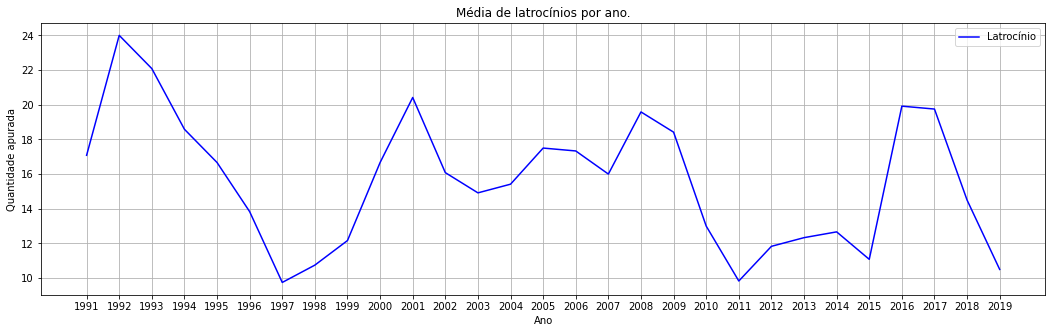



Quantidade mínima de latrocínios na série:  2
Quantidade máxima de latrocínios na série:  36
Uma redução de 94.44% na quantidade de latrocínios, quando comparados o maior e o menor valor

Primeiro valor computado na série histórica:  15
Último valor computado na série histórica:  6
Uma redução de 60.00% na quantidade de latrocínios, quando comparados o primeiro e o último valor na série histórica


In [22]:
#Criar as variáveis para armazenar as somas e as médias
soma_latrocinio = df_aux.groupby(['vano']).sum()
media_latrocinio = df_aux.groupby(['vano']).mean()

#Criar a figura do gráfico 1
fig = plt.figure(figsize=(18,5))

#plotar o gráfico da soma com as legendas e o grid pra melhor visualização
soma_latrocinio.latrocinio.plot(color='red',grid=True, legend=True, label='Latrocínio', title='Soma de latrocínios por ano.')
plt.ylabel("Quantidade apurada")
plt.xlabel("Ano")
plt.xticks(range(1991,2020))

#exibir a figura
plt.show()

#Criar a figura do gráfico 2
fig = plt.figure(figsize=(18,5))

#plotar o gráfico da média com as legendas e o grid pra melhor visualização
media_latrocinio.latrocinio.plot(color='blue',grid=True, legend=True, label='Latrocínio', title='Média de latrocínios por ano.')
plt.ylabel("Quantidade apurada")
plt.xlabel("Ano")
plt.xticks(range(1991,2020))

#exibir a figura
plt.show()

#Variáveis para os valores máximos e mínimos
max_latrocinio = df_aux.latrocinio.max()
min_latrocinio = df_aux.latrocinio.min()
pct_latrocinio = (1-(min_latrocinio / max_latrocinio)) * 100

#Exibindo o resultado
print("\n\nQuantidade mínima de latrocínios na série: ", min_latrocinio)
print("Quantidade máxima de latrocínios na série: ", max_latrocinio)
print("Uma redução de {:.2f}% na quantidade de latrocínios, quando comparados o maior e o menor valor".format(pct_latrocinio))

#Variáveis para o primeiro e o último valor
primeiro_latrocinio = df_aux.latrocinio.iloc[0]
ultimo_latrocinio = df_aux.latrocinio.iloc[-1]
pct_latrocinio_inicio_fim = (1-(ultimo_latrocinio / primeiro_latrocinio)) * 100

#Exibindo o resultado
print("\nPrimeiro valor computado na série histórica: ", primeiro_latrocinio)
print("Último valor computado na série histórica: ", ultimo_latrocinio)
print("Uma redução de {:.2f}% na quantidade de latrocínios, quando comparados o primeiro e o último valor na série histórica".format(pct_latrocinio_inicio_fim))

#### Morte de policiais

Ser policial é perigoso, não só no Rio de Janeiro, mas em qualquer lugar do país. Por vezes temos notícias de agentes sendo mortos em confrontos diretos com criminosos, em emboscadas armadas e até mesmo em assaltos.

Tentaremos analisar a situação dos crimes cometidos contra policiais militares e civis com os dados que temos disponíveis.

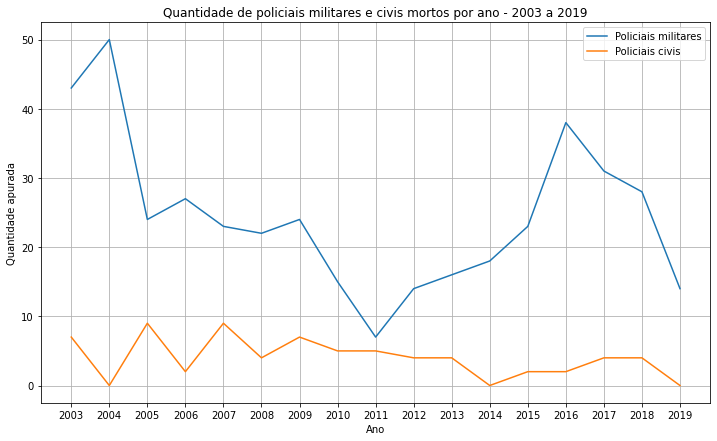

In [23]:
#Tamanho da figura
fig = plt.figure(figsize=(12,7))

#Criando uma cópia do dataframe original para exclusão das colunas com valores N/A
df_policiais = df.copy().groupby(['vano']).sum()

#Variaveis para cada categoria de policial com os valores N/A excluidos
pol_militar = df_policiais.pol_militares_mortos_serv[df_policiais.index >= 2003]
pol_civil = df_policiais.pol_civis_mortos_serv[df_policiais.index >= 2003]

#Plot do gráfico
pol_militar.plot(legend=True, grid=True, label='Policiais militares')
pol_civil.plot(legend=True,  grid=True, label='Policiais civis')

#Configuração da exibição
plt.xticks(range(2003,2020))
plt.xlabel('Ano')
plt.ylabel('Quantidade apurada')
plt.title('Quantidade de policiais militares e civis mortos por ano - 2003 a 2019')

#exibição da imagem
plt.show();


Iniciamos a análise dos dados a partir **do início da apuração das mortes de policiais, que ocorreu de 2003** em diante de acordo com nosso heatmap.

Percebemos que existe uma **queda no total de mortes**, tanto de policiais civis quanto de militares, porém as mortes de **policiais militares são bem maiores** em comparação e possuem alguns períodos de pico, em especial os anos de 2004 e 2016.

Analisaremos as duas categorias em separado.

In [24]:
#Criando as variáveis para:

#Valor máximo
morte_pol_militares_max = pol_militar.loc[(pol_militar == pol_militar.max())]

#Valor mínimo
morte_pol_militares_min = pol_militar.loc[(pol_militar == pol_militar.min())]

#Total do período
soma_morte_pol_militares = pol_militar.sum()

#Primeiro valor apurado
primeiro_valor_pol_militar = pol_militar.iloc[0]

#Último valor apurado 
ultimo_valor_pol_militar = pol_militar.iloc[-1]

#Porcentagem para comparação
pct_mortes_pm = (1-(ultimo_valor_pol_militar / primeiro_valor_pol_militar))*100

#Exibindo as informações
print('\n\nEstatísticas de mortes de policiais militares no estado do Rio de Janeiro - 2003 a 2019')
print('\nUm total de {:.0f} policiais militares foram mortos no período.'.format(soma_morte_pol_militares))
print('O ano de {:.0f} registrou a maior quantidade de óbitos de policiais militares, com {:.0f} mortos.'.format(morte_pol_militares_max.index[0],morte_pol_militares_max.values[0]))
print('Em comparação, o ano de {:.0f} registrou a menor quantidade de mortes, com {:.0f} registros.'.format(morte_pol_militares_min.index[0],morte_pol_militares_min.values[0]))
print('No primeiro ano apurado, em 2003, foram registradas {:.0f} mortes.'.format(primeiro_valor_pol_militar))
print('Em 2019, último ano de apuração, foram registradas {:.0f} mortes.'.format(ultimo_valor_pol_militar))
print('O estado conta com uma redução de {:.2f}% no número de mortes de policiais militares, se comparados o primeiro e o último anos apurados.'.format(pct_mortes_pm))

#Lista da quantidade de mortes ordenada 
lista_morte_anos_pm = pol_militar.groupby(pol_militar.index).sum()

#Exibindo a lista
print('\nQuantidade de de mortes de policiais militares por ano:\n\n', lista_morte_anos_pm);



Estatísticas de mortes de policiais militares no estado do Rio de Janeiro - 2003 a 2019

Um total de 417 policiais militares foram mortos no período.
O ano de 2004 registrou a maior quantidade de óbitos de policiais militares, com 50 mortos.
Em comparação, o ano de 2011 registrou a menor quantidade de mortes, com 7 registros.
No primeiro ano apurado, em 2003, foram registradas 43 mortes.
Em 2019, último ano de apuração, foram registradas 14 mortes.
O estado conta com uma redução de 67.44% no número de mortes de policiais militares, se comparados o primeiro e o último anos apurados.

Quantidade de de mortes de policiais militares por ano:

 vano
2003    43.0
2004    50.0
2005    24.0
2006    27.0
2007    23.0
2008    22.0
2009    24.0
2010    15.0
2011     7.0
2012    14.0
2013    16.0
2014    18.0
2015    23.0
2016    38.0
2017    31.0
2018    28.0
2019    14.0
Name: pol_militares_mortos_serv, dtype: float64


In [25]:
#Criando as variáveis para:

#Valor máximo
morte_pol_civil_max = pol_civil.loc[(pol_civil == pol_civil.max())]

#Valor mínimo
morte_pol_civil_min = pol_civil.loc[(pol_civil == pol_civil.min())]

#Total do período
soma_morte_pol_civil = pol_civil.sum()

#Primeiro valor apurado
primeiro_valor_pol_civil = pol_civil.iloc[0]

#Último valor apurado 
ultimo_valor_pol_civil = pol_civil.iloc[-1]

#Criar uma variável sem os valores zeros para realizar a contagem
lista_sem_zero_civil = pol_civil.loc[(pol_civil.values != 0)]

#Porcentagem para comparação
pct_mortes_civil = (1-(lista_sem_zero_civil.min() / lista_sem_zero_civil.max()))*100

#Comparação pme civil
pct_militar_civil = ( soma_morte_pol_militares / soma_morte_pol_civil )*100

#Exibindo as informações
print('\n\nEstatísticas de mortes de policiais civis no estado do Rio de Janeiro - 2003 a 2019')
print('\nUm total de {:.0f} policiais civis foram mortos no período.'.format(soma_morte_pol_civil))
print('Os anos de {:.0f} e {:.0f} registraram a maior quantidade de óbitos de policiais civis, com {:.0f} mortos.'.format(morte_pol_civil_max.index[0], morte_pol_civil_max.index[1],morte_pol_civil_max.values[0]))
print('Em comparação, os anos de {:.0f}, {:.0f} e {:.0f} registraram a menor quantidade de mortes, com {:.0f} registros.'.format(morte_pol_civil_min.index[0], morte_pol_civil_min.index[1], morte_pol_civil_min.index[2],morte_pol_civil_min.values[0]))
print('No primeiro ano apurado, em 2003, foram registradas {:.0f} mortes.'.format(primeiro_valor_pol_civil))
print('Em 2019, último ano de apuração, foram registradas {:.0f} mortes.'.format(ultimo_valor_pol_civil))

#Lista da quantidade de mortes ordenada 
lista_morte_anos_civil = pol_civil.groupby(pol_civil.index).sum()

#Exibindo a lista
print('\nQuantidade de de mortes de policiais civis por ano:\n\n', lista_morte_anos_civil);

#Comparação entre as duas categorias
print('\n\nAs mortes de policiais militares são {:.2f}% maiores que as mortes de policiais civis.'.format(pct_militar_civil))




Estatísticas de mortes de policiais civis no estado do Rio de Janeiro - 2003 a 2019

Um total de 68 policiais civis foram mortos no período.
Os anos de 2005 e 2007 registraram a maior quantidade de óbitos de policiais civis, com 9 mortos.
Em comparação, os anos de 2004, 2014 e 2019 registraram a menor quantidade de mortes, com 0 registros.
No primeiro ano apurado, em 2003, foram registradas 7 mortes.
Em 2019, último ano de apuração, foram registradas 0 mortes.

Quantidade de de mortes de policiais civis por ano:

 vano
2003    7.0
2004    0.0
2005    9.0
2006    2.0
2007    9.0
2008    4.0
2009    7.0
2010    5.0
2011    5.0
2012    4.0
2013    4.0
2014    0.0
2015    2.0
2016    2.0
2017    4.0
2018    4.0
2019    0.0
Name: pol_civis_mortos_serv, dtype: float64


As mortes de policiais militares são 613.24% maiores que as mortes de policiais civis.


Com a análise realizada conseguimos notar uma **tendência de queda no total de mortes, tanto de policiais militares quanto de policiais civis**, apesar de haver alguns picos em alguns momentos durante o histórico de dados.

Vemos também que os **policiais militares** representam a grande parte da parcela de óbitos, com um valor incrível de **613,24% acima das mortes de policiais civis**

## Conclusão

O estado do Rio de Janeiro possui incríveis belezas naturais e paisagens exuberantes, com cartões postais que são conhecidos mundialmente, mas infelizmente sofre com a violência.

Apesar da **queda de alguns indicadores** aqui analisados, os **números ainda são alarmantes**.


In [26]:
total_roubos_furtos.sum()

6832286

In [27]:
roubo_furto_veiculos

1418439

**Roubos e furtos somam um total de 6.832.286 registro**s, desde 1991. Destes 1.418.439 são roubos ou furtos a veículos.

In [28]:
(soma_homicidio.hom_doloso.sum()) + (soma_latrocinio.latrocinio.sum()) + ((soma_morte_pol_civil + soma_morte_pol_militares).sum())

179442.0

Crimes de homicídio, latrocínio e crimes contra policiais somam absurdos **179.442 registros**.

Podemos ainda realizar um pequeno resumo dos dados gerais.

In [29]:
#Somar colunas de total de roubos e furtos
df_resumo = df_aux.copy()
df_resumo.drop(['total_roubos','total_furtos', 'outros_furtos', 'indicador_roubo_veic', 'recuperacao_veiculos','indicador_roubo_rua'], axis=1, inplace=True)

#Somatória dos maiores indices
df_resumo.sum().sort_values(ascending=False).head(10)

registro_ocorrencias    13340952.0
lesao_corp_dolosa        1889523.0
ameaca                   1371521.0
roubo_transeunte         1175971.0
lesao_corp_culposa        845869.0
roubo_veiculo             842352.0
furto_veiculos            576087.0
furto_transeunte          522509.0
estelionato               446372.0
outros_roubos             416661.0
dtype: float64

No período analisado foram registrados mais de **13.340.000 (treze milhões!) de registros de ocorrências**. 

Destas, mais de 1.8 milhões foram de lesão corporal dolosa, 1.3 milhões referentes a ameaças e 1.1 milhões foram crimes de roubos a transeunte.

In [30]:
#Indices de 2003 a 2019 a cada 10.000 habitantes.
df_resumo.loc[2003:2019].sum().sort_values(ascending=False).head()*10000 / 16370000

registro_ocorrencias    7059.091631
lesao_corp_dolosa        780.919365
ameaca                   708.376909
roubo_transeunte         622.607819
lesao_corp_culposa       397.973732
dtype: float64

Realizando um cálculo dos crimes cometidos de **2003 a 2019** a cada **10.000 (10 mil)** habitantes, considerando uma população de **16.370.000** pessoas, temos os seguintes dados:

* Foram registradas 7.059 ocorrências para cada 10.000 habitantes;
* Cometidos 780 crimes de lesão corporal dolosa;
* Registrados 708 crimes de ameaça;
* Realizados 622 roubos a transeuntes.



---



